In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.linalg import eigh, svd
from scipy import exp
import time
import glob
import PIL
import imageio
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import linalg
import numpy as np
layers = tf.keras.layers
import os
import cv2
from IPython.display import clear_output
from sklearn.externals import joblib 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from itertools import cycle, islice
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import MinMaxScaler, StandardScaler
colors = np.array(list(islice(cycle(["#377eb8", "#ff7f00", "#4daf4a",
                                                 "#f781bf", "#a65628", "#984ea3",
                                                 "#999999", "#e41a1c", "#dede00"]),
                                          int(20 + 1))))

C:\Users\ilida\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)

In [3]:
from IPython.display import clear_output

In [4]:
def ToVector(Y):
    a = np.unique(Y)
    yvec = np.zeros((Y.shape[0], a.shape[0]))
    for i in range(0,Y.shape[0]):
        yvec[i,:] = a == Y[i]
    return yvec

In [5]:
def LabelKernel(X,Y):
    X = (np.array(X))
    Y = (np.array(Y))
    L = np.dot(X,Y.T) * 1
    return np.transpose(L);

In [6]:
def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image to the desired size.
    return tf.image.resize(img, [256, 256])

def process_path(file_path):
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img

In [7]:
dir_with_labels = "D:\\Labels\\"

df = pd.read_csv(dir_with_labels+"labels_and_encoded_images.csv")


In [10]:
index_for_data = 0

In [11]:
min_number = 2000

2000

In [12]:
df['faceAttributes_age'] = df['faceAttributes_age']/100

In [13]:
df.describe()

,faceAttributes_age,faceAttributes_facialHair_beard,faceAttributes_facialHair_moustache,faceAttributes_facialHair_sideburns,faceAttributes_gender_female,faceAttributes_gender_male,faceAttributes_smile,faceAttributes_glasses_NoGlasses,faceAttributes_glasses_ReadingGlasses,faceAttributes_glasses_Sunglasses,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,...,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000,58935.000000
mean,0.329710,0.089414,0.087096,0.062781,0.590481,0.409519,0.540084,0.940969,0.032816,0.025265,...,0.302157,-0.633458,-0.148120,0.129048,0.183289,-0.042559,0.292965,-0.041263,-0.487850,-0.587860
std,0.101254,0.156479,0.153657,0.112186,0.491749,0.491749,0.460972,0.235685,0.178156,0.156931,...,2.669264,1.850282,2.504958,2.537635,2.713038,2.841852,2.555108,1.934434,2.361831,3.145524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-12.117503,-11.564065,-12.704538,-11.551445,-11.918502,-14.012863,-12.572187,-10.265343,-11.810198,-19.859505
25%,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,1.000000,0.000000,0.000000,...,-1.445460,-1.831588,-1.747872,-1.522061,-1.575365,-1.860151,-1.364650,-1.299233,-2.043088,-2.594504
50%,0.310000,0.000000,0.000000,0.000000,1.000000,0.000000,0.723000,1.000000,0.000000,0.000000,...,0.283444,-0.627177,-0.141278,0.135502,0.164186,-0.038680,0.302701,-0.066989,-0.512527,-0.594621
75%,0.360000,0.100000,0.100000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,2.019657,0.556483,1.475436,1.777311,1.911922,1.818206,1.953811,1.189055,1.045599,1.432242
max,0.720000,0.900000,0.900000,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,15.032414,9.223302,11.880507,12.555540,15.078077,16.208220,12.922899,12.543044,12.075478,16.900230


In [14]:
df_labels  = df

In [15]:
columns = ['faceAttributes_age', 
       'faceAttributes_facialHair_beard',
       'faceAttributes_gender_female','faceAttributes_gender_male',
       'faceAttributes_smile','imgId','mse'
                    ]

In [16]:
df_labels = df_labels[columns]

In [17]:
df_labels.head()

,faceAttributes_age,faceAttributes_facialHair_beard,faceAttributes_gender_female,faceAttributes_gender_male,faceAttributes_smile,imgId,mse
0,0.33,0.0,1,0,1.000,000001.jpg,0.020575
1,0.39,0.0,1,0,0.001,000022.jpg,0.005828
2,0.30,0.0,1,0,0.001,000024.jpg,0.018337
3,0.25,0.0,1,0,0.000,000026.jpg,0.010200
4,0.31,0.0,1,0,1.000,000027.jpg,0.006397


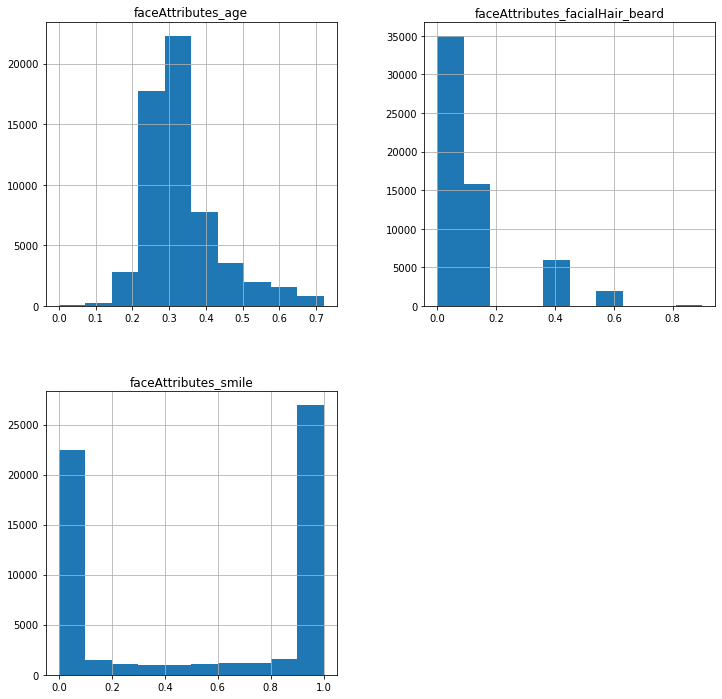

In [18]:
df[['faceAttributes_age', 
       'faceAttributes_facialHair_beard',
       'faceAttributes_smile']].hist(bins=10,figsize = (12,12))
plt.savefig('histograms.pdf')

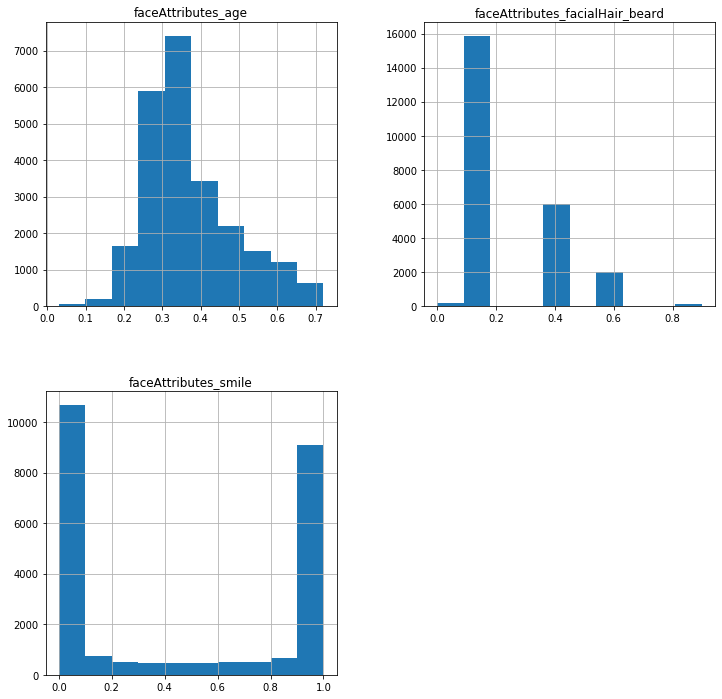

In [19]:
df[df["faceAttributes_gender_male"] == 1][['faceAttributes_age', 
       'faceAttributes_facialHair_beard',
       'faceAttributes_smile']].hist(bins=10,figsize = (12,12))
plt.savefig('histograms_mens.pdf')

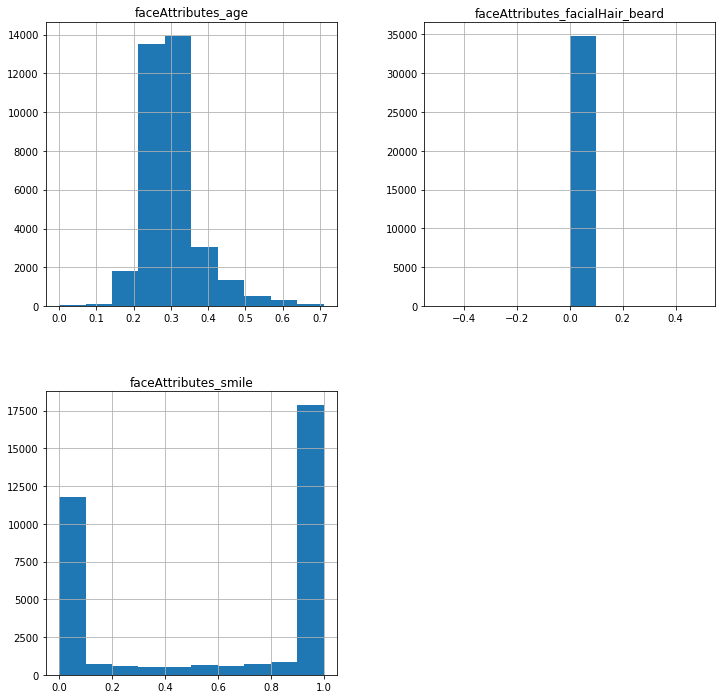

In [20]:
df[df["faceAttributes_gender_male"] == 0][['faceAttributes_age', 
       'faceAttributes_facialHair_beard',
       'faceAttributes_smile']].hist(bins=10,figsize = (12,12))
plt.savefig('histograms_womens.pdf')

In [21]:
df_class_0 = df[df["faceAttributes_gender_male"] == 1]
df_class_1 = df[df["faceAttributes_gender_male"] == 0]

idx_smallestwomen = df_class_0.nsmallest(8,["mse"]).index
idx_smallestmen = df_class_1.nsmallest(8,["mse"]).index


idx_smallestwomen = df.loc[idx_smallestwomen]
idx_smallestmen = df.loc[idx_smallestmen]

df_class_0_under = df_class_0.sample(min_number)
df_class_1_under = df_class_1.sample(min_number)
df_test_under = pd.concat([df_class_0_under, df_class_1_under,
                           idx_smallestwomen,
                           idx_smallestmen
                          ], axis=0)

df1 = df_test_under.reset_index(drop=True)


In [22]:
df['faceAttributes_smile'].head()

0    1.000
1    0.001
2    0.001
3    0.000
4    1.000
Name: faceAttributes_smile, dtype: float64

In [23]:
smiles = df.groupby(['faceAttributes_smile'])
beard = df.groupby(['faceAttributes_facialHair_beard'])
ages = df.groupby(['faceAttributes_age'])

In [24]:
min_smiles=min(smiles['faceAttributes_age'].count().values)
min_beards=min(beard['faceAttributes_age'].count().values)
min_ages=min(ages['faceAttributes_age'].count().values)

In [25]:
res = [df_test_under]
res2 =  [df_test_under.index]

In [26]:
for index,df_temp in smiles:
    id_temp = df_temp.sample(min(12,df_temp.values.shape[0])).index
    res2.append(id_temp)
    res.append(df.loc[id_temp])
for index,df_temp in beard:
    id_temp = df_temp.sample(min(12,df_temp.values.shape[0])).index
    res2.append(id_temp)
    res.append(df.loc[id_temp])
for index,df_temp in ages:
    id_temp = df_temp.sample(min(12,df_temp.values.shape[0])).index
    res2.append(id_temp)
    res.append(df.loc[id_temp])
for index,df_temp in df.groupby(['faceAttributes_facialHair_moustache']):
    id_temp = df_temp.sample(min(12,df_temp.values.shape[0])).index
    res2.append(id_temp)
    res.append(df.loc[id_temp])
for index,df_temp in df.groupby(['faceAttributes_facialHair_sideburns']):
    id_temp = df_temp.sample(min(12,df_temp.values.shape[0])).index
    res2.append(id_temp)
    res.append(df.loc[id_temp])

In [27]:
df2 = pd.concat(res, axis=0)
df2 = df2.drop_duplicates(subset=df.columns[index_for_data:], keep="last").reset_index(drop=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224955DC048>,
      dtype=object)

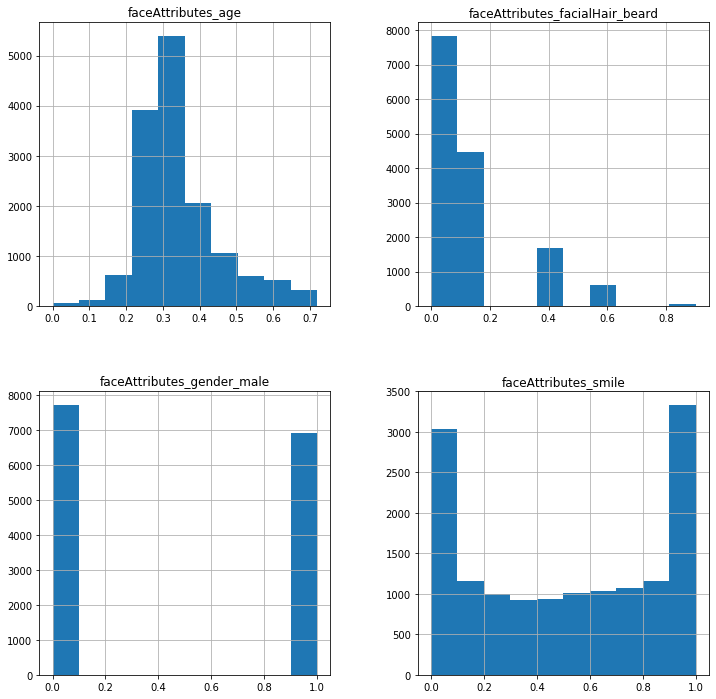

In [29]:
df2[['faceAttributes_age', 
       'faceAttributes_facialHair_beard',
       'faceAttributes_smile','faceAttributes_gender_male']].hist(bins=10,figsize = (12,12))

In [30]:
src = os.path.join(dir_with_labels, "data_picked_for_SKPCA.csv")
df2.to_csv(src,index=False)